<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0.0.1">Импорт библиотек</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1">Обзор данных</a></span></li><li><span><a href="#Удаление-лишних-столбцов" data-toc-modified-id="Удаление-лишних-столбцов-1.2">Удаление лишних столбцов</a></span></li><li><span><a href="#Обработка-пропусков,-дубликатов,-выбросов-и-аномалий" data-toc-modified-id="Обработка-пропусков,-дубликатов,-выбросов-и-аномалий-1.3">Обработка пропусков, дубликатов, выбросов и аномалий</a></span></li><li><span><a href="#Подготовка-данных-к-обучению-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-моделей-1.4">Подготовка данных к обучению моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5">Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.1">RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.2">LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.3">CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.4">LGBMRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3">Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.1">RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2">LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.3">CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.4">LGBMRegressor</a></span></li><li><span><a href="#Проверка-моделей:-DummyRegressor" data-toc-modified-id="Проверка-моделей:-DummyRegressor-3.5">Проверка моделей: DummyRegressor</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.6">Сравнение моделей</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.7">Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4">Выводы</a></span></li></ul></div>

# Построение модели определения стоимости автомобиля

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости. 

Заказчику важны:
- качество предсказания;
- скорость предсказания;
- время обучения.

**Цель исследования:** 
Построение модели ML для определения рыночной стоимости автомобиля.

**Задачи:**
* Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробовать разные гиперпараметры. Значение RMSE для обученных моделей должно быть меньше 2500
* Проанализировать время обучения, время предсказания и качество моделей.
* Опираясь на критерии заказчика, выбрать лучшую модель, проверить её качество на тестовой выборке.

**Ход исследования:**
 * Шаг 1: Подготовка данных
 * Шаг 2: Обучение моделей
 * Шаг 3: Анализ моделей
 * Шаг 4: Выводы

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

try:
    from pandas_profiling import ProfileReport
except:
    !pip3 install pandas-profiling
    from pandas_profiling import ProfileReport

from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.3f}'.format

import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)

RANDOM_STATE = 12345

## Подготовка данных

### Обзор данных

Для первичного ознакомления с данными выведем первые 5 строк таблицы, а также получим информацию о таблице с помощью метода `info()`.

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Согласно документации к данным, в таблице содержатся:

**Признаки**

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**  
`Price` — цена (евро)

### Удаление лишних столбцов

Изменим тип данных столбцов, содержащих даты. Исследуем необходимость сохранения этих столбцов для дальнейшего обучения.

In [4]:
date_columns = ['DateCrawled', 'DateCreated', 'LastSeen']
for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d %H:%M:%S")
    print(date_column)
    print(df[date_column].describe(datetime_is_numeric=True), '\n')

DateCrawled
count                           354369
mean     2016-03-21 12:58:10.450648320
min                2016-03-05 14:06:22
25%                2016-03-13 11:52:33
50%                2016-03-21 17:50:55
75%                2016-03-29 14:37:20
max                2016-04-07 14:36:58
Name: DateCrawled, dtype: object 

DateCreated
count                           354369
mean     2016-03-20 19:12:07.753274112
min                2014-03-10 00:00:00
25%                2016-03-13 00:00:00
50%                2016-03-21 00:00:00
75%                2016-03-29 00:00:00
max                2016-04-07 00:00:00
Name: DateCreated, dtype: object 

LastSeen
count                           354369
mean     2016-03-29 23:51:00.667456768
min                2016-03-05 14:15:08
25%                2016-03-23 02:50:03
50%                2016-04-03 15:15:51
75%                2016-04-06 10:15:19
max                2016-04-07 14:58:51
Name: LastSeen, dtype: object 



В колонках `DateCrawled` и `LastSeen` диапзон дат составляет примерно месяц. Сомнительно, что дата скачивания анкеты из базы и дата последней активности пользователя сильно влияет на стоимость автомобиля в пределах одного месяца 2016 года - эти столбцы можно будет удалить из таблицы.

В колонке `DateCreated` самая ранняя дата создания анкеты относится к 2014 году. За два года цены на автомобили могли поменяться. Однако, из информации по квантилям видно, что анкет, созданных раньше марта 2016 года немного.   
Если анкет, созданных, к примеру, раньше января 2016 года пренебрежительно мало, от столбца `DateCreated` также можно отказаться, посчитав, что мы рассматриваем анкеты за небольшой промежуток времени в 3-4 месяца, когда изменение стоимости автомобилей незначительно.

In [5]:
# посчитаем количество "старых" анкет
t = datetime.strptime('2016-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
df.query('DateCreated < @t').shape[0]

26

Анкет, созданных в 2014 и 2015 годах, не так много, поэтому можем считать диапазон приведённых дат небольшим и отказаться от всех столбцов, содержащих даты.

Столбец с количеством фотографий автомобиля также кажется подозрительным: проверим его значения.
Также проверим значения столбца `RegistrationMonth`.

In [6]:
print(df['NumberOfPictures'].value_counts())
print()
df['RegistrationMonth'].value_counts()

0    354369
Name: NumberOfPictures, dtype: int64



0     37352
3     34373
6     31508
4     29270
5     29153
7     27213
10    26099
12    24289
11    24186
9     23813
1     23219
8     22627
2     21267
Name: RegistrationMonth, dtype: int64

Столбец `NumberOfPictures` содержит только нули, поэтому тоже подлежит удалению.   
Столбец `RegistrationMonth` содержит 13 значений, что является аномалией. С учётом того, что возраст автомобиля обычно определяется с точностью до года, этот столбец также можно не рассматривать при обучении.   
Удалим также столбец `PostalCode`, во избежание переобучения модели.

In [7]:
# во избежание случайной потери данных, создадим новый датафрейм без лишних столбцов
df_clean = (df.copy().drop(date_columns, axis=1)
            .drop(['NumberOfPictures', 'PostalCode', 'RegistrationMonth'], axis=1))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             334664 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   Repaired          283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


### Обработка пропусков, дубликатов, выбросов и аномалий

Выведем расширенную информацию о датафрейме с помощью `ProfileReport`.

In [8]:
%%time

profile_df_clean = ProfileReport(df_clean)
profile_df_clean.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 21 s, sys: 2.96 s, total: 23.9 s
Wall time: 22 s


При анализе таблицы обнаружены следующие несовершенства:
* пропуски значений в нескольких столбцах
* аномалии в значении года регистрации автомобиля
* выбросы в столбцах `Power`и `Kilometer`
* большое количество пропусков в столбце `Repaired`.

Проверим таблицу на наличие дубликатов и удалим их. Выведем количество пропущенных значений для каждого столбца.

In [9]:
print('\nDuplicates before:', df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print('\nDuplicates now:',df_clean.duplicated().sum())
print()

print('NULL:\n', df_clean.isna().sum())


Duplicates before: 45040

Duplicates now: 0

NULL:
 Price                   0
VehicleType         34559
RegistrationYear        0
Gearbox             17207
Power                   0
Model               18361
Kilometer               0
FuelType            30764
Brand                   0
Repaired            64558
dtype: int64


Избавимся от пропусков: рассмотрим значения для каждого столбца с пропусками для поиска разумной замены.

In [10]:
for column in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired']:
    print(column, '\n')
    print(df_clean[column].sort_values().unique(), '\n')
    print(df_clean[column].value_counts().sort_values(ascending=False), '\n')


VehicleType 

['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon' nan] 

sedan          78206
small          67548
wagon          56367
bus            25830
convertible    18195
coupe          14690
suv            10776
other           3158
Name: VehicleType, dtype: int64 

Gearbox 

['auto' 'manual' nan] 

manual    232774
auto       59348
Name: Gearbox, dtype: int64 

Model 

['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'co

Рассмотрим отдельно каждый столбец:

* `VehicleType`: преобладает тип кузова седан, но при замене пропущенных значений на тип седан возникнет большой перекос в данном типе, поэтому можно придержаться нейтралитета и заменить пропуски категорией 'other'
* `Gearbox`: явный перекос в сторону МКПП - это самый распространённый тип коробки передач - может быть, именно поэтому пользователи забывают указывать это, как само собой разумеющееся. Если заменим пропуски на 'manual', то общее количество МКПП увеличится всего на 7%
* `Model`: в столбце присутвует более 200 названий моделей, и поэтому, при наличии столбцов `Brand` и `VehicleType`, данный столбец является неинформативным и подлежит удалению во избежание переобучения моделей. Но на всякий случай, пока заполним пропуски категорией 'other'.
* `FuelType`: наиболее распространённая категория топлива - бензин. Возможно, ситуация здесть такая же, как и с типом коробки передач: пользователи не указывают эту информацию, потому что считают её очевидной. При замене пропусков на значение 'petrol' эта категория увеличится на 16%
* `Repaired`: самая противоречивая категория. Перевешивает значение 'no', но количество пропусков превышает ответы 'yes'. Думаю, если автомобиль по-настоящему "не бит, не крашен", то продавец автомобиля с гордостью обязательно это укажет. Если история автомобиля не такая безупречная, то о ней хочется умолчать при продаже :)  Заменим пропуски на 'yes'.

In [11]:
df_clean['VehicleType'] = df_clean['VehicleType'].fillna('other')
df_clean['Gearbox'] = df_clean['Gearbox'].fillna('manual')
df_clean['Model'] = df_clean['Model'].fillna('other')
df_clean['FuelType'] = df_clean['FuelType'].fillna('petrol')
df_clean['Repaired'] = df_clean['Repaired'].fillna('yes')

print('NULL now:', df_clean.isna().sum().sum())

NULL now: 0


Рассмотрим аномалии и выбросы в количественных столбцах.

In [12]:
df_clean.describe()

,Price,RegistrationYear,Power,Kilometer
count,"309,329.000","309,329.000","309,329.000","309,329.000"
mean,"4,486.937","2,004.360",110.977,"127,217.736"
std,"4,564.853",92.541,200.969,"38,532.941"
min,0.000,"1,000.000",0.000,"5,000.000"
25%,"1,100.000","1,999.000",69.000,"125,000.000"
50%,"2,800.000","2,003.000",105.000,"150,000.000"
75%,"6,500.000","2,008.000",143.000,"150,000.000"
max,"20,000.000","9,999.000","20,000.000","150,000.000"


Столбец `Price` - целевой. Однако, в нём присутствуют нулевые значения, на которых модель может переобучиться и в дальнейшем неправильно предсказывать результат. Посчитаем долю нулевых значений целевого признака от начального количества данных.

In [13]:
print(f"Доля нулевых значений целевого признака: {int(len(df_clean.query('Price == 0')) * 100 / len(df))}%")
print(f"Количество нулевых значений целевого признака: {len(df_clean.query('Price == 0'))}")

Доля нулевых значений целевого признака: 2%
Количество нулевых значений целевого признака: 8904


Нулевые значения столбца `Price` составляют всего 2%, от них можно избавиться во избежание проблем с качеством обучения.

In [14]:
df_clean = df_clean[df_clean['Price'] != 0]
df_clean.shape

(300425, 10)

Рассмотрим столбец`RegistrationYear`. В нём присуствуют аномальные значения двух типов: 
* слишком маленькие значение года регистрации ТС: в интернете можно найти ретро-автомобили вплоть до 1930-х гг., но более старые модели представляют собой большую редкость и могут быть отнесены к аномалиям.
* слишком большие значения года регистрации: согласно колонке с датой публикации объявлений, в таблице содержатся объявления не позднее 2016 года, следовательно, год регистрации автомобиля с пробегом не может превышать это значение.

Посмотрим на количество записей, подходящих под категорию аномалии

In [15]:
print('RegistrationYear < 1930:', 
      df_clean.query('RegistrationYear < 1930').shape[0],
     f", доля {int(len(df_clean.query('RegistrationYear < 1940')) * 100 / len(df))}%")
print('RegistrationYear > 2017:', 
      df_clean.query('RegistrationYear > 2016').shape[0],
     f", доля {int(len(df_clean.query('RegistrationYear > 2016')) * 100 / len(df))}%")


RegistrationYear < 1930: 115 , доля 0%
RegistrationYear > 2017: 12920 , доля 3%


Доля аномалий относительно начальных размеров таблицы невелика, поэтому строки с аномальным годом регистрации можно удалить.

In [16]:
df_clean = df_clean[df_clean['RegistrationYear'] > 1930]
df_clean = df_clean[df_clean['RegistrationYear'] < 2017]
df_clean.shape

(287388, 10)

Проверим колонку с мощностью автомобиля. В ней присутсвуют нулевые значения, а также слишком завшенные значения: посмотрим на их количество.

In [17]:
print('Power = 0 :', df.query('Power == 0').shape[0])
print('Power > 500:', df.query('Power > 500').shape[0])

Power = 0 : 40225
Power > 500: 459


В колонке `Power` достаточно много нулей. В качестве кандидата на замену нулевых значений можно выбрать медианное значение мощности без учета этих нулей. Автомобилей с мощностью более 500 л.с. не так много, поэтому можно их также вычеркнуть.

In [18]:
# найдём медианное значение мощности продаваемых автомобилей
median_power = df_clean.query('Power > 0')['Power'].median()
median_power

114.0

In [19]:
# заменим нулевые значения на медианные
df_clean.loc[df_clean['Power'] == 0, 'Power'] = median_power
# удалим строки с аномально высоким значением мощности
df_clean = df_clean[df_clean['Power'] <= 500]
df_clean.shape

(287003, 10)

Ещё раз посмотрим на гистограммы распределения количественных признаков после обработки выбросов и аномалий.

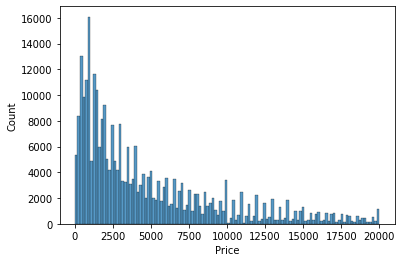

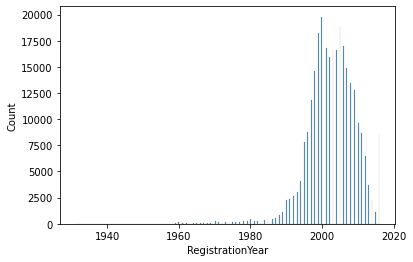

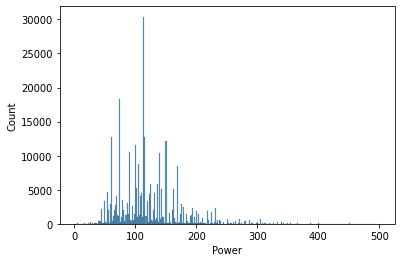

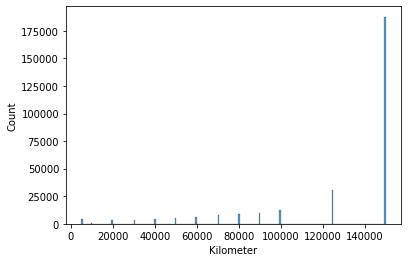

In [20]:
for _ in ['Price', 'RegistrationYear', 'Power', 'Kilometer']:
    sns.histplot(data=df_clean, x=_)
    plt.show();

Качество признаков улучшилось. Посмотрим, какое количество данных осталось для обучения после обработки.

In [21]:
print(f"После обработки осталось {round((len(df_clean) *100 / len(df)), 2)}% от начального количества строк")
print(f"Текущее количество строк: {len(df_clean)}")

После обработки осталось 80.99% от начального количества строк
Текущее количество строк: 287003


### Подготовка данных к обучению моделей

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287003 entries, 0 to 309328
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             287003 non-null  int64  
 1   VehicleType       287003 non-null  object 
 2   RegistrationYear  287003 non-null  int64  
 3   Gearbox           287003 non-null  object 
 4   Power             287003 non-null  float64
 5   Model             287003 non-null  object 
 6   Kilometer         287003 non-null  int64  
 7   FuelType          287003 non-null  object 
 8   Brand             287003 non-null  object 
 9   Repaired          287003 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 24.1+ MB


Выделим категориальные и количественные столбцы

In [23]:
categorical = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired']
numeric = ['RegistrationYear', 'Power', 'Kilometer']

Выделим матрицу признаков и вектор целевого признака

In [24]:
features = df_clean.drop(['Price', 'Model'], axis=1)
target = df_clean['Price']

print(features.shape)
print(target.shape)

(287003, 8)
(287003,)


Разделим выборку на тренировочную и тестовую подвыборки

In [25]:
def split_scale(features, target):
    """
    Функция принимает на вход таблицу признаков features и столбец целевого признака target, 
    и возвращает тренировочную и тестовую выборку для features и target в соотношении 3:1
    """
    
    # разделим выборку на две части: обучающую и тестовую
    (features_train, features_test, 
     target_train, target_test) = train_test_split(features, 
                                                   target,
                                                   test_size=.25,
                                                   random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

    
    return (features_train, features_test,
           target_train, target_test)

In [26]:
features_train, features_test, \
target_train, target_test = split_scale(features, target)

print('Train:', features_train.shape, target_train.shape)
print('Test:', features_test.shape, target_test.shape)

Train: (215252, 8) (215252,)
Test: (71751, 8) (71751,)


Закодируем категориальные признаки двумя методами: One Hot Encoding (подходит для линейных моделей) и Ordinal Encoding (для ускорения моделей на базе решающего дерева):

In [27]:
# One Hot Encoding
features_train_ohe = features_train.copy().reset_index()
features_test_ohe = features_test.copy().reset_index()

ohe_encoder = OneHotEncoder(handle_unknown='ignore') 
ohe_encoder.fit(features_train_ohe[categorical]) 
    

features_train_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_train_ohe[categorical]).toarray())
features_train_ohe = features_train_ohe.join(features_train_ohe_cat)
features_train_ohe = features_train_ohe.drop(['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired', 'index'], axis= 1)


features_test_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_test_ohe[categorical]).toarray())
features_test_ohe = features_test_ohe.join(features_test_ohe_cat)
features_test_ohe = features_test_ohe.drop(['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired', 'index'], axis= 1)


                                             
print('Train OHE:', features_train_ohe.shape)
print('Test OHE:', features_test_ohe.shape)

Train OHE: (215252, 62)
Test OHE: (71751, 62)


In [28]:
# Ordinal Encoding

features_train_oe = features_train.copy().reset_index()
features_test_oe = features_test.copy().reset_index()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
encoder.fit(features_train_oe[categorical]) 
    

features_train_oe[categorical] = pd.DataFrame(encoder.transform(features_train_oe[categorical]))

features_test_oe[categorical] = pd.DataFrame(encoder.transform(features_test_oe[categorical]))
                                             
print('Train OE:', features_train_oe.shape)
print('Test OE:', features_test_oe.shape)

Train OE: (215252, 9)
Test OE: (71751, 9)


### Вывод

В результате предобработки данных были выполнены следующие действия:
* данные были загружены и изучены
* были удалены неинформативные столбцы (DateCrawled, LastSeen, DateCreated, NumberOfPictures, RegistrationMonth, PostalCode)
* были удалены дубликаты, заполнены пропущенные значения
* были обработаны выбросы и аномалии в числовых столбцах
* данные были подготовлены к задачам ML: разделены на train/test выборки, числовые признаки отмасштабированы, категориальные признаки перекодированы методами One Hot Encoding и Ordinal Encoding

## Обучение моделей

### RandomForestRegressor

In [29]:
%%time

param_rf = {
        'n_estimators':range(50,500,4),
        'max_depth':range(2,15,1),
        'max_features':['auto', 'sqrt'],
        'min_samples_split':range(2,5,1),
        'min_samples_leaf': [1, 2, 3],
        'bootstrap':[True, False]
}

model_forest = RandomForestRegressor(random_state=RANDOM_STATE)
grid_rf = RandomizedSearchCV(model_forest, 
                          param_rf, 
                          cv = 3, 
                          scoring = 'neg_root_mean_squared_error', 
                          n_iter=6, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                          verbose=2)

grid_rf.fit(features_train_oe, target_train)
# выведем модель с наилучшей оценкой
best_estimator = grid_rf.best_estimator_
print("\nПараметры лучшей модели решающего леса:\n", best_estimator)
# выведем наилучшую оценку
rmse_forest_cv = -1 * grid_rf.best_score_ 
print("\nRMSE лучшей модели решающего леса на CV:", round(rmse_forest_cv, 3))

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Параметры лучшей модели решающего леса:
 RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=278, random_state=12345)

RMSE лучшей модели решающего леса на CV: 1872.6
CPU times: user 2min 30s, sys: 116 ms, total: 2min 30s
Wall time: 9min 32s


### LinearRegression

In [30]:
%%time
model_linear = LinearRegression()
rmse_scores = cross_val_score(model_linear,
                        features_train_ohe,
                        target_train,
                        scoring='neg_root_mean_squared_error', 
                         cv=3)
rmse_lin_cv = -1 * rmse_scores.mean()
print("RMSE линейной регрессии на CV:", round(rmse_lin_cv, 3))

RMSE линейной регрессии на CV: 2888.112
CPU times: user 5.53 s, sys: 3.39 s, total: 8.92 s
Wall time: 4.43 s


### CatBoostRegressor

In [31]:
%%time
param_cb = {
    'learning_rate': [0.05, 0.3],
    'depth': [5, 6, 7],
    'l2_leaf_reg': [1, 3, 5],
    'grow_policy': ['SymmetricTree', 'Lossguide'],
    'iterations': range(300, 901, 100)
}


    
train_pool = cb.Pool(features_train, 
                     target_train, 
                     cat_features=categorical)
test_pool = cb.Pool(features_test, cat_features=categorical)
    
model = cb.CatBoostRegressor(
        loss_function='RMSE',
        verbose=0
    )

randomized_search_result = model.randomized_search(param_cb, 
                                                   X=train_pool,
                                                   cv = 3, 
                                                   n_iter=6)
print('Лучшие параметры для CatBoost:', randomized_search_result['params'])


bestTest = 1775.925093
bestIteration = 299

0:	loss: 1775.9250935	best: 1775.9250935 (0)	total: 15.2s	remaining: 1m 15s

bestTest = 1798.024103
bestIteration = 499

1:	loss: 1798.0241033	best: 1775.9250935 (0)	total: 41.9s	remaining: 1m 23s

bestTest = 1748.023379
bestIteration = 299

2:	loss: 1748.0233794	best: 1748.0233794 (2)	total: 1m 1s	remaining: 1m 1s

bestTest = 1759.411343
bestIteration = 599

3:	loss: 1759.4113429	best: 1748.0233794 (2)	total: 1m 37s	remaining: 48.7s

bestTest = 1783.942336
bestIteration = 799

4:	loss: 1783.9423358	best: 1748.0233794 (2)	total: 2m 22s	remaining: 28.5s

bestTest = 1749.419325
bestIteration = 629

5:	loss: 1749.4193250	best: 1748.0233794 (2)	total: 3m 8s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 1725.377186
bestIteration = 299

Training on fold [1/3]

bestTest = 1729.781232
bestIteration = 299

Training on fold [2/3]

bestTest = 1740.986554
bestIteration = 288

Лучшие параметры для CatBoost: {'depth': 7, 'l

In [32]:
print('Лучшие параметры для CatBoost:', randomized_search_result['params'])
rmse_cb_cv = np.mean([1701.673651, 1667.125452, 1691.324305])
print('\nRMSE для CatBoost на CV:', round(rmse_cb_cv, 3))

Лучшие параметры для CatBoost: {'depth': 7, 'l2_leaf_reg': 1, 'iterations': 300, 'learning_rate': 0.3, 'grow_policy': 'SymmetricTree'}

RMSE для CatBoost на CV: 1686.708


### LGBMRegressor

In [33]:
# подготовим категориальные признаки для обучения LightGBM
for c in categorical:
    features_train[c] = features_train[c].astype('category')
print(features_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215252 entries, 97304 to 234390
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   VehicleType       215252 non-null  category
 1   RegistrationYear  215252 non-null  float64 
 2   Gearbox           215252 non-null  category
 3   Power             215252 non-null  float64 
 4   Kilometer         215252 non-null  float64 
 5   FuelType          215252 non-null  category
 6   Brand             215252 non-null  category
 7   Repaired          215252 non-null  category
dtypes: category(5), float64(3)
memory usage: 7.6 MB
None


In [34]:
%%time
 
param_lgbm = {
    'learning_rate': [0.01, 0.1, 0.05],
    'num_leaves': [30, 90, 120, 200],
    'max_depth' : [5,6,7,8]
    }

model_lgbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)
grid_lgbm = RandomizedSearchCV(model_lgbm, 
                          param_lgbm, 
                          cv = 3, 
                          scoring = 'neg_root_mean_squared_error', 
                          n_iter=10, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                          verbose=2)
grid_lgbm.fit(features_train, target_train)
# выведем модель с наилучшей оценкой
best_estimator_lgbm = grid_lgbm.best_estimator_
print("Параметры лучшей модели LightGBM:\n", best_estimator_lgbm)
# выведем наилучшую оценку
rmse_lgbm_cv = -1 * grid_lgbm.best_score_ 
print("RMSE лучшей модели LightGBM на CV:", round(rmse_lgbm_cv, 3))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Параметры лучшей модели LightGBM:
 LGBMRegressor(max_depth=8, num_leaves=200, random_state=12345)
RMSE лучшей модели LightGBM на CV: 1721.072
CPU times: user 5.43 s, sys: 208 ms, total: 5.63 s
Wall time: 29.1 s


## Анализ моделей

Помимо качества моделей для заказчика важны время обучения и скорость предсказания, проверим эти параметры для каждой модели.

### RandomForestRegressor

In [35]:
%%time

model_rf = RandomForestRegressor(max_depth=12, 
                                 min_samples_leaf=2, 
                                 min_samples_split=4,
                                 n_estimators=278, 
                                 random_state=RANDOM_STATE)
model_rf.fit(features_train_oe, target_train)

CPU times: user 2min 26s, sys: 384 ms, total: 2min 26s
Wall time: 2min 26s


In [36]:
%%time

model_rf.predict(features_train_oe)

CPU times: user 6.82 s, sys: 243 ms, total: 7.06 s
Wall time: 7.09 s


array([ 1442.37788486, 13225.43426514,  8573.32283423, ...,
        4118.97196463,  1221.06590386,   997.37719498])

### LinearRegression

In [37]:
%%time

model_linear = LinearRegression()
model_linear.fit(features_train_ohe, target_train)

CPU times: user 2.53 s, sys: 1.52 s, total: 4.06 s
Wall time: 2.23 s


In [38]:
%%time

model_linear.predict(features_train_ohe)

CPU times: user 41.4 ms, sys: 20 ms, total: 61.4 ms
Wall time: 27.5 ms


array([  235.75, 12597.5 ,  8832.75, ...,  4367.  ,   626.  ,  6667.25])

### CatBoostRegressor

In [39]:
%%time

catboost_params = {'depth': 6, 
                   'l2_leaf_reg': 3, 
                   'iterations': 900, 
                   'learning_rate': 0.3, 
                   'grow_policy': 'Lossguide',
                   'loss_function': 'RMSE',
                   'verbose': 100}
model_cb = cb.CatBoostRegressor(**catboost_params)

model_cb.fit(train_pool)

0:	learn: 3700.0060833	total: 85.9ms	remaining: 1m 17s
100:	learn: 1728.1343170	total: 7.3s	remaining: 57.8s
200:	learn: 1669.9263120	total: 13.7s	remaining: 47.5s
300:	learn: 1627.9451085	total: 19.8s	remaining: 39.3s
400:	learn: 1599.3478513	total: 25.9s	remaining: 32.2s
500:	learn: 1578.0868168	total: 31.4s	remaining: 25s
600:	learn: 1559.5745365	total: 37s	remaining: 18.4s
700:	learn: 1541.6490380	total: 42.7s	remaining: 12.1s
800:	learn: 1527.3753083	total: 48.2s	remaining: 5.96s
899:	learn: 1515.2294107	total: 54.1s	remaining: 0us
CPU times: user 3min 12s, sys: 5.38 s, total: 3min 17s
Wall time: 55.3 s


In [40]:
%%time

model_cb.predict(train_pool)

CPU times: user 6.25 s, sys: 2.97 ms, total: 6.25 s
Wall time: 1.66 s


array([1.11095977e+03, 1.47935210e+04, 8.79849726e+03, ...,
       3.66878617e+03, 9.39208579e+02, 3.88260183e-02])

### LGBMRegressor

In [41]:
%%time

model_lgbm = lgb.LGBMRegressor(max_depth=8, num_leaves=200, random_state=RANDOM_STATE)
model_lgbm.fit(features_train_oe, target_train)

CPU times: user 4.92 s, sys: 38.1 ms, total: 4.96 s
Wall time: 1.32 s


In [42]:
%%time

model_lgbm.predict(features_train_oe)

CPU times: user 2.83 s, sys: 0 ns, total: 2.83 s
Wall time: 757 ms


array([ 1248.03535125, 14858.22570704,  8272.79662884, ...,
        4281.20016211,   961.24164391,   816.07192591])

### Проверка моделей: DummyRegressor

Проверим результаты моделей на тестовой выборке с результатами наивной модели:

In [43]:
def rmse_dummy(features_train, features_test, target_train, target_test):

    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(features_train, target_train)
    predicted_test = dummy_regr.predict(features_test)
    predicted_test = pd.Series(predicted_test)
    mse = mean_squared_error(target_test, predicted_test)
    
    return mse ** .5

In [44]:
print('RMSE для DummyRegressor:',round(rmse_dummy(features_train_ohe, features_test_ohe, target_train, target_test),3))

RMSE для DummyRegressor: 4606.259


Все обученные модели прошли тест на адекватность: значения ошибки для их предсказаний намного меньше ошибки наивной модели, при этом только линейная регрессия выдаёт значение RMSE более 2500 на кросс-валидации и тестовой выборке, поэтому от рассмотрения этой модели можно отказаться.

### Сравнение моделей

Построим сравнительную таблицу для всех моделей: будем сравнивать критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

In [45]:
compare = {'model': ['RandomForestRegressor',
                    'LinearRegression',
                    'CatBoostRegressor',
                    'LGBMRegressor'], 
           'RMSE': [rmse_forest_cv,
                   rmse_lin_cv,
                   rmse_cb_cv,
                   rmse_lgbm_cv],
          'learning_time': ['2min 58s', '3.21 s', '1min 9s', '1.48 s'],
          'prediction_time': ['8.59 s', '20.6 ms', '1.86 s', '316 ms']}
compare = pd.DataFrame(data=compare)
compare.sort_values(by='RMSE')

,model,RMSE,learning_time,prediction_time
2,CatBoostRegressor,"1,686.708",1min 9s,1.86 s
3,LGBMRegressor,"1,721.072",1.48 s,316 ms
0,RandomForestRegressor,"1,872.600",2min 58s,8.59 s
1,LinearRegression,"2,888.112",3.21 s,20.6 ms


Наименьшее значение RMSE на кросс-валидации показывает модель CatBoost, однако по скорости обучения и предсказания со значительным отрывом лидирует модель LightGBM, не сильно уступая CatBoost по качеству. Поскольку в данный момет нам важна не только метрика, но и скорость обучения и предсказания, в качестве лучшей модели выберем LightGBM и проверим её на тестовой выборке.

### Проверка лучшей модели на тестовой выборке

In [46]:
%%time

lgbm_predict = model_lgbm.predict(features_test_oe)
print('RMSE для LGBMRegressor:', round(mean_squared_error(target_test, lgbm_predict) ** 0.5, 3))

RMSE для LGBMRegressor: 1757.966
CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 286 ms


## Выводы

Целью проекта является построение модели для определение рыночной стоимости автомобиля. Для реализации цели были вполнены следующие задачи:
* проведён обзор данных и удаление неинформативных столбцов и дубликатов
* были обработаны пропуски, выбросы и аномалии
* данные были разбиты на обучающую и тренировочную выборки и подготовлены к обучению моделей: количественные признаки были отмастабированы, категориальные признаки были перекодированы методами OneHot Encoding и Ordinal Encoding для обучения моделей разных типов.
* были обучены 4 модели при различных гиперпараметрах:
    * Random Forest
    * Linear Regression
    * CatBoost
    * LightGBM
    
Модель линейной регрессии показала наихудшее качество: RMSE превышает значение 2500, поэтому линейную регрессию можно не учитывать в результатах.  
Из оставшихся трёх моделей наилучшее качество на кросс-валидации показала модель CatBoostRegressor (RMSE = 1687). По скорости обучения и предсказания самая быстрая модель - LGBMRegressor, которая также не сильно уступает по метрике модели CatBoost (RMSE = 1692).

Таким образом, в качестве лучше модели была выбрана и проверена на тестовой выборке модель LGBMRegressor: RMSE на тесте 1690.

Возможные улучшения: можно уменшить метрику RMSE, расширив диапазон параметров для метода RandomizedSearchCV и увеличив количество итераций для моделей градиентного бустинга.